## QSO & QSO candidates catalog in ten DES SN fields

### All the QSO and QSO candidates come from three catalogs:

__1.Million quasar catalog (MQC):__

include 577,146 QSO and 1297,111 quasar candidates (total 1,874,257) with 80% posibility to be QSO
see their web [here](https://heasarc.gsfc.nasa.gov/W3Browse/all/milliquas.html)

__2.DiPompeo'quasar Probabilities catalog:__

include 5,537,436 Pqso > 0.2, here we selected 2,797,507 Pqso > 0.8 quasar candidates
see their [paper](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1507.02884)

__3.Tie's ozDES quasar catalog:__

include 1263 spectroscopically confirmed quasars 
see their [paper](http://adsabs.harvard.edu/abs/2017AJ....153..107T)


### Y3A1 SN Field Variability Catalog

The DES-SN field point sources (RA, DEC) are selected from Eric Morganson's Y3A1 SN Field Variability Catalog.
A sample of 885,181 variable point sources are garthered.
See selection details (internal web) [here](https://opensource.ncsa.illinois.edu/confluence/pages/viewpage.action?spaceKey=DESDM&title=Y3A1+SN+Field+Variability+Catalog)
Since Eric built the catalog before OzDES, his selection missed 290 OzDES spectriscopically confirmed QSOs. Thus, in the latter step, these QSOs are added back through combining the 1263 OzDES QSOs. 


After crossing match with them with 3 arcsec, we get 3687 QSO (2318 spectroscopically confirmed) and candidates in our final catalog. Note that most Xmatch processes are finished in [TOPCAT](http://www.star.bris.ac.uk/~mbt/topcat/). 

### Stripe 82 - SN quasar catalog

I also selected the S82 objects from final catalog, and get 1059 QSOs (624 spectroscopically confirmed from MQC) and candidates (S82_SN_quasar_catalog.fits).

Since the Dip catalog is made before DR14Q, some "Q" marked QSOs in MQC are marked as "qQ" in Dip's catalog. Our final catalog is mainly inherited from Dip, so we need to rematch the DR14Q to get the "qQ" flaged real spectrosopically confirmed QSOs (173 missing_qQ_173.fits). 

Totally, in 1059 QSOs, we have (624+173 spectroscopically confirmed QSO)


### NOTES


For flags_[grizy]= 1,2,3, I complied another 791 sources sample (all_flaged_qso&candidate.fits) 

flags_g = 1 - the detected object has neighbors, bright and close enough to bias photometry significantly (more than 10% of the integrated area is affected) 

flags_g = 2 - the object was originally blended with another one

For each catalog, there is a type flag: 
Q :spectroscopically confirmed quasar from million quasar catalog. 
QQ: spectroscopically confirmed from ozDES catalog.
qQ: prob > 0.8 unconfirmed and confirmed (if prob = 1) QSO and from Dip's catalog.
q: QSO candidates

In [229]:
#make a lite version of million quasar catalog since it is too large, we only need RA and DEC 
import numpy as np
data=np.genfromtxt('/Users/legolason/study/otherwork/tony/mill.txt',dtype='|S32')
for i in range(len(data)):
    data[i,2]=str(data[i,2])[0]

ind =np.where((data[:,2] == 'q') | (data[:,2] == 'Q'))
ind_zero=np.where(data[:,3].astype(float) == 0. )
data[ind_zero,3] = -1.
print data

c1 = fits.Column(name='RA',array=data[ind,0].flatten(),format='E')
c2 = fits.Column(name='DEC',array=data[ind,1].flatten(),format='E')
c3 = fits.Column(name='Redshift',array=data[ind,3].flatten(),format='E')
c4 = fits.Column(name='Type',array=data[ind,2].flatten(),format='A2')

h=fits.BinTableHDU.from_columns([c1, c2, c3, c4])
h.writeto('/Users/legolason/study/otherwork/tony/mill_QSO.fits')


[['0.0015265' '27.7322826' 'q' '0.9000']
 ['0.0018983' '17.7737391' 'Q' '2.3090']
 ['0.0019139' '9.3856373' 'q' '2.0000']
 ..., 
 ['359.9997591' '20.7210794' 'Q' '2.0100']
 ['359.9998329' '-0.0328611' 'Q' '1.5600']
 ['359.9999541' '34.7471333' 'Q' '2.3750']]


In [9]:
#combine million quasar catalog and dip's catalog to a big catalog including 2797509 qso and cnadidates except ozDES
import numpy as np
from astropy.io import fits
import glob, os
import pandas as pd

dip=fits.open('/Users/legolason/study/otherwork/tony/dip_QSO_catalog.fits')
#dip.info()
dd=dip[1].data
ind=np.where(dd['pqso'] > 0.8,True,False )
print np.sum(ind)
ra_dip=dd['ra'][ind]
dec_dip=dd['dec'][ind]
z_dip=dd['peakz'][ind]
type_dip=np.repeat('qQ',len(z_dip))

mill_data=fits.open('/Users/legolason/study/otherwork/tony/mill_QSO.fits')
mill=mill_data[1].data
ra_mill=mill['ra']
dec_mill=mill['dec']
z_mill=mill['redshift']
type_mill=mill['type']


ra=np.hstack((ra_mill,ra_dip))
dec=np.hstack((dec_mill,dec_dip))
z=np.hstack((z_mill,z_dip))
tp=np.hstack((type_mill,type_dip))

c1 = fits.Column(name='RA',array=ra,format='E')
c2 = fits.Column(name='DEC',array=dec,format='E')
c3 = fits.Column(name='Redshift',array=z,format='E')
c4 = fits.Column(name='Type',array=tp,format='A2')

h=fits.BinTableHDU.from_columns([c1, c2, c3, c4])
h.writeto('/Users/legolason/study/otherwork/tony/All_QSO&candicate_ra_dec.fits')
# this catalog may have some duplicates since ra dec within 3", but after Xmatching with SN catalog, we will get unique
print 'total sources :',1874254+np.sum(ind)

2797507
total sources : 4671761


In [25]:
#produce the SN_Field_variability source ra dec catalog to match with QSO candidates catalog
import numpy as np
from astropy.io import fits
import glob, os
import pandas as pd

path='/Users/legolason/study/otherwork/tony/SN_varibility/'
os.chdir(path)

ra=np.array([])
dec=np.array([])
magr=np.array([])
region=np.array([])

for file in zip(glob.glob("*.fits"),range(len(glob.glob("*.fits")))):
    data=fits.open(file[0])[1].data
    ra=np.append(ra,data['ra'])
    dec=np.append(dec,data['dec'])
    magr=np.append(magr,data['MAG_AUTO_R'])
    region=np.append(region,np.repeat(str(file[0])[0:2],len(data)))
    
#save data to fits
c1 = fits.Column(name='RA',array=ra,format='E')
c2 = fits.Column(name='DEC',array=dec,format='E')
c3 = fits.Column(name='MAG_AUTO_R',array=magr,format='E')
c4 = fits.Column(name='Region',array=region,format='A2')
h=fits.BinTableHDU.from_columns([c1, c2, c3,c4])
h.writeto('/Users/legolason/study/otherwork/tony/SN_field_variability_ra_dec.fits')

In [126]:
#combine SN_field_variability&ALL_QSO_candidates  and ozDES 

a=np.genfromtxt('/Users/legolason/study/otherwork/tony/ozdes_QSO.txt')
ra_a=a[:,2]
dec_a=a[:,3]
z_a=a[:,4]
type_a=np.repeat('QQ',len(ra_a))
magr_a=a[:,7]

data2=fits.open('/Users/legolason/study/otherwork/tony/inALL_not_inSN.fits')
b=data2[1].data
ra_b=b['ra_1']
dec_b=b['dec_1']
z_b=b['redshift']
type_b=b['type']
magr_b=b['mag_auto_r']


ra_qso=np.append(ra_a,ra_b)
dec_qso=np.append(dec_a,dec_b)
z_qso=np.append(z_a,z_b)
type_qso=np.append(type_a,type_b)
mag_qso=np.append(magr_a,magr_b)

df=pd.DataFrame({'1RA':ra_qso,
                 '2DEC':dec_qso,
                 '3redshift':z_qso,
                 '4Mag_R':mag_qso,
                 '5type':type_qso})

df1=df.sort_values(by='1RA')
#print df1.iloc[:,0]
c1 = fits.Column(name='RA',array=df1.iloc[:,0],format='E')
c2 = fits.Column(name='DEC',array=df1.iloc[:,1],format='E')
c3 = fits.Column(name='Redshift',array=df1.iloc[:,2],format='E')
c4 = fits.Column(name='MAG_R',array=df1.iloc[:,3],format='E')
c5 = fits.Column(name='Type',array=df1.iloc[:,4],format='A2')
h=fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5])
h.writeto('/Users/legolason/study/otherwork/tony/final_SN_field_qso&candidate.fits')



In [127]:
print a[:,4].min(),b['redshift'].min()

0.198 -1.0


In [130]:
data=fits.open('/Users/legolason/study/otherwork/tony/final_SN_field_qso&candidate.fits')
s82=data[1].data

ind=np.where((s82['ra'] > 39.) & (s82['ra'] < 45.) & (s82['dec'] > -2.5) & (s82['dec'] < 1.), True,False)
c1 = fits.Column(name='RA',array=s82['ra'][ind],format='E')
c2 = fits.Column(name='DEC',array=s82['dec'][ind],format='E')
c3 = fits.Column(name='redshift',array=s82['redshift'][ind],format='E')
c4 = fits.Column(name='MAG_R',array=s82['mag_r'][ind],format='E')
c5 = fits.Column(name='type',array=s82['type'][ind],format='A2')
h=fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5])
h.writeto('/Users/legolason/study/otherwork/tony/S82_SN_quasar_catalog.fits')


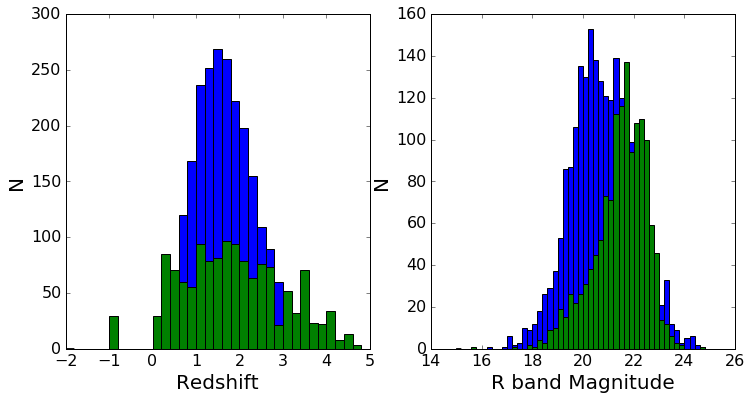

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('my')

ind_Q=np.where((s82['type'] == 'Q') |(s82['type'] == 'QQ') ,True,False)
ind_q=[not i for i in ind_Q]

fig=plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(s82['redshift'][ind_Q],np.arange(-2,5,0.2))
plt.hist(s82['redshift'][ind_q],np.arange(-2,5,0.2))

plt.xlabel('Redshift')
plt.ylabel('N')
plt.subplot(122)
plt.hist(s82['mag_r'][ind_Q],np.arange(15,25,0.2))
plt.hist(s82['mag_r'][ind_q],np.arange(15,25,0.2))

plt.xlabel('R band Magnitude')
plt.ylabel('N')


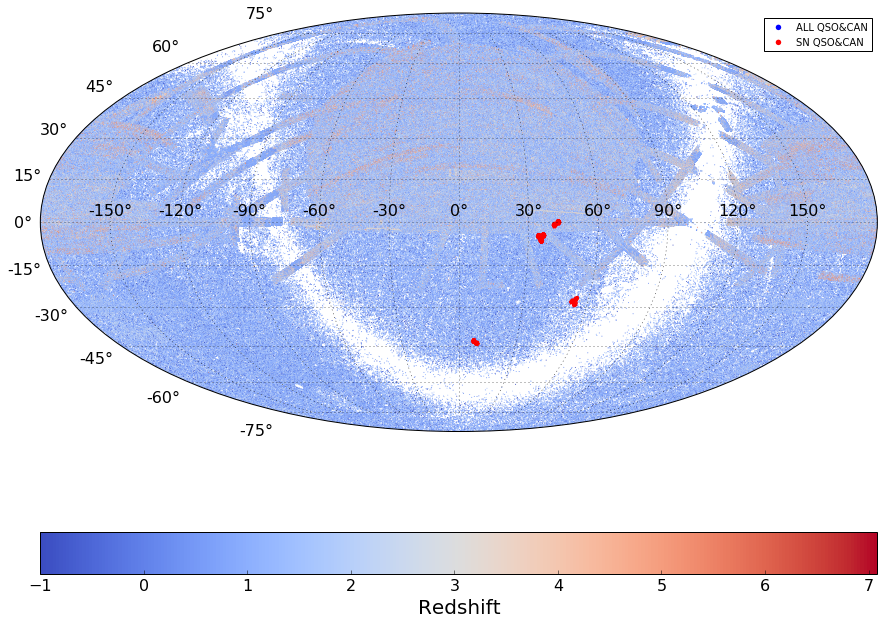

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import ephem

plt.style.use('my')
hd = fits.open('/Users/legolason/study/otherwork/tony/All_QSO&candicate_ra_dec.fits')

data=hd[1].data
RA = data['RA']
DEC = data['DEC']
RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180


plt.figure(figsize=(15,12))
ax=plt.subplot(111)
ax = plt.axes(projection='mollweide')
plt.scatter(RA,DEC,s=1,c=data['redshift'],cmap=plt.cm.coolwarm,
            edgecolors='none', linewidths=0,label='ALL QSO&CAN')

plt.grid(True)


cb = plt.colorbar(orientation='horizontal')
cb.set_label('Redshift')

#------SN qso---------

hd = fits.open('/Users/legolason/study/otherwork/tony/final_SN_field_qso&candidate.fits')

data=hd[1].data
RA = data['RA']
DEC = data['DEC']
#RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180

#-------ozdes---------



#ax = plt.axes(projection='mollweide')
plt.scatter(RA,DEC,s=1,color='red',
            edgecolors='none', linewidths=0,label='SN QSO&CAN')



lgnd=plt.legend(loc='best',scatterpoints=1,fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

#plt.savefig('/Users/legolason/study/dr14q/paper_figure/skymap.eps')

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



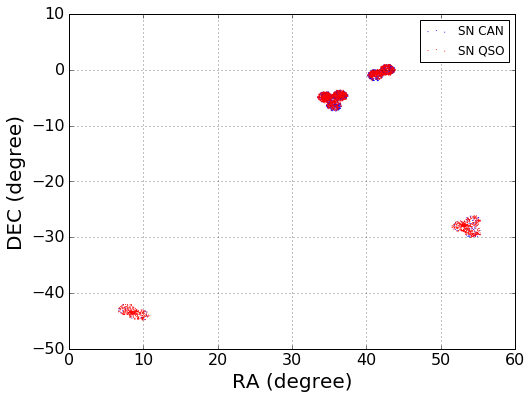

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import ephem

plt.style.use('my')
hd = fits.open('/Users/legolason/study/otherwork/tony/final_SN_field_qso&candidate.fits')

data=hd[1].data
RA = data['RA']
DEC = data['DEC']
#RA -= 180
#RA *= np.pi / 180
#DEC *= np.pi / 180

ind_Q=np.where((data['type'] == 'Q') |(data['type'] == 'QQ') ,True,False)
ind_q=[not i for i in ind_Q]

plt.figure(figsize=(8,6))
ax=plt.subplot(111)
#ax = plt.axes(projection='mollweide')
plt.scatter(RA[ind_q],DEC[ind_q],s=1,color='blue',cmap=plt.cm.coolwarm,
            edgecolors='none', linewidths=0,label='SN CAN')

plt.scatter(RA[ind_Q],DEC[ind_Q],s=1,color='red',cmap=plt.cm.coolwarm,
            edgecolors='none', linewidths=0,label='SN QSO')
plt.grid()
plt.xlabel('RA (degree)')
plt.ylabel('DEC (degree)')
plt.legend()

#----s82 region
#theta = np.arange(0,2*np.pi,0.1)
#x = np.array([-np.pi*4./3.,-np.pi*1./3.,-np.pi*4/3.,-np.pi*1./3.])
#y = np.array([-0.014,0.014,-0.014,0.014])
#ax.plot(x,y)


In [ ]:
#SQL select all the POINT sources with flags_[grizy] =1,2,3 in SN fields accroding ERIC's page
# Download from public DR1_MAIN or Y3A1_COADD_OBJECT_SUMMARY is the same 
# TOTAL 269936 sources 
#paste to https://des.ncsa.illinois.edu/easyweb/db-access
select 
    RA, DEC, MAGERR_AUTO_R,flags_r 
from Y3A1_COADD_OBJECT_SUMMARY
where 
   (RA between 54.2743-1.1/COS(-27.1116*0.0174) and 54.2743+1.1/COS(-27.1116*0.0174) and DEC between (-27.1116-1.1) and  (-27.1116+1.1) or 
    RA between 54.2743-1.1/COS(-29.0884*0.0174) and 54.2743+1.1/COS(-29.0884*0.0174) and DEC between (-29.0884-1.1) and  (-29.0884+1.1) or
    RA between 52.6484-1.1/COS(-28.1000*0.0174) and 54.2743+1.1/COS(-28.1000*0.0174) and DEC between (-28.1000-1.1) and  (-28.1000+1.1) or
    RA between 7.87440-1.1/COS(-43.0096*0.0174) and 7.87440+1.1/COS(-43.0096*0.0174) and DEC between (-43.0096-1.1) and  (-43.0096+1.1) or
    RA between 9.50000-1.1/COS(-43.9980*0.0174) and 9.50000+1.1/COS(-43.9980*0.0174) and DEC between (-43.9980-1.1) and  (-43.9980+1.1) or
    RA between 42.8200-1.1/COS(0.000000*0.0174) and 42.8200+1.1/COS(0.000000*0.0174) and DEC between (0.000000-1.1) and  (0.000000+1.1) or
    RA between 41.1944-1.1/COS(-0.98840*0.0174) and 41.1944+1.1/COS(-0.98840*0.0174) and DEC between (-0.98840-1.1) and  (-0.98840+1.1) or
    RA between 34.4757-1.1/COS(-4.92950*0.0174) and 34.4757+1.1/COS(-4.92950*0.0174) and DEC between (-4.92950-1.1) and  (-4.92950+1.1) or
    RA between 35.6645-1.1/COS(-6.41210*0.0174) and 35.6645+1.1/COS(-6.41210*0.0174) and DEC between (-6.41210-1.1) and  (-6.41210+1.1) or
    RA between 36.4500-1.1/COS( -4.6000*0.0174) and 36.4500+1.1/COS( -4.6000*0.0174) and DEC between (-4.60000-1.1) and  (-4.60000+1.1)) and     
    flags_g between 1. and 3. and flags_r between 1. and 3. and flags_i between 1. and 3. and flags_z between 1. and 3. and flags_y between 1. and 3. and
    imaflags_iso_g = 0 and imaflags_iso_r = 0 and imaflags_iso_i = 0 and imaflags_iso_z = 0 and imaflags_iso_y = 0
    and (power(spread_model_i,2) < (power(0.003,2.) + 4.* spreaderr_model_i)) 
order by RA, DEC;

In [ ]:
#Paste to easyacess 
select RA, DEC, MAGERR_AUTO_R,flags_r from Y3A1_COADD_OBJECT_SUMMARY where (RA between 54.2743-1.1/COS(-27.1116*0.0174) and 54.2743+1.1/COS(-27.1116*0.0174) and DEC between (-27.1116-1.1) and  (-27.1116+1.1) or RA between 54.2743-1.1/COS(-29.0884*0.0174) and 54.2743+1.1/COS(-29.0884*0.0174) and DEC between (-29.0884-1.1) and  (-29.0884+1.1) or RA between 52.6484-1.1/COS(-28.1000*0.0174) and 54.2743+1.1/COS(-28.1000*0.0174) and DEC between (-28.1000-1.1) and  (-28.1000+1.1) or RA between 7.87440-1.1/COS(-43.0096*0.0174) and 7.87440+1.1/COS(-43.0096*0.0174) and DEC between (-43.0096-1.1) and  (-43.0096+1.1) or RA between 9.50000-1.1/COS(-43.9980*0.0174) and 9.50000+1.1/COS(-43.9980*0.0174) and DEC between (-43.9980-1.1) and  (-43.9980+1.1) or RA between 42.8200-1.1/COS(0.000000*0.0174) and 42.8200+1.1/COS(0.000000*0.0174) and DEC between (0.000000-1.1) and  (0.000000+1.1) or RA between 41.1944-1.1/COS(-0.98840*0.0174) and 41.1944+1.1/COS(-0.98840*0.0174) and DEC between (-0.98840-1.1) and  (-0.98840+1.1) or RA between 34.4757-1.1/COS(-4.92950*0.0174) and 34.4757+1.1/COS(-4.92950*0.0174) and DEC between (-4.92950-1.1) and  (-4.92950+1.1) or RA between 35.6645-1.1/COS(-6.41210*0.0174) and 35.6645+1.1/COS(-6.41210*0.0174) and DEC between (-6.41210-1.1) and  (-6.41210+1.1) or RA between 36.4500-1.1/COS( -4.6000*0.0174) and 36.4500+1.1/COS( -4.6000*0.0174) and DEC between (-4.60000-1.1) and  (-4.60000+1.1)) and flags_g between 1. and 3. and flags_r between 1. and 3. and flags_i between 1. and 3. and flags_z between 1. and 3. and flags_y between 1. and 3. and imaflags_iso_g = 0 and imaflags_iso_r = 0 and imaflags_iso_i = 0 and imaflags_iso_z = 0 and imaflags_iso_y = 0 and (power(spread_model_i,2) < (power(0.003,2.) + 4.* spreaderr_model_i)) order by RA, DEC; > all_flaged_point_source.fits

[ 41.1782074] [-0.70643902]


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


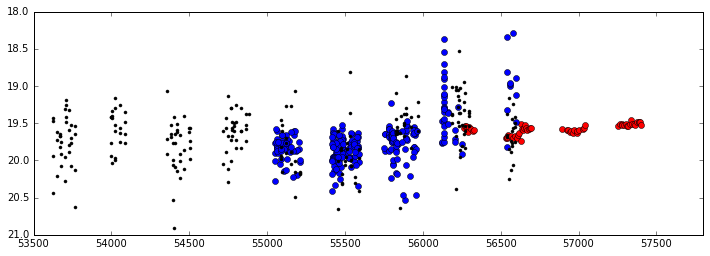

In [3]:
# only source in charisi16 and SN field 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
data=fits.open('/Users/legolason/study/otherwork/tony/SN_varibility/S2_lc.fits')
d=data[1].data
ind=np.where(d['ra'] == 41.178207)
print d['ra'][ind],d['dec'][ind]

fig=plt.figure(figsize=(12,4))
#Mag = 22.5 - 2.5 log10(Flux)
plt.plot(d['lc_mjd_r'][ind],22.5-2.5*np.log10(d['lc_flux_auto_r'][ind]),'ro')
plt.xlim(53500,57800)
plt.ylim(21.,18)

ptf=np.genfromtxt('/Users/legolason/study/otherwork/tony/PTF_CRTS/lc_ptf.txt')
mjd=ptf[:,0]
mag=ptf[:,1]
plt.plot(mjd,mag,'bo')

crts=np.genfromtxt('/Users/legolason/study/otherwork/tony/PTF_CRTS/crts.csv')
mjd2=crts[:,4]
mag2=crts[:,0]
plt.plot(mjd2,mag2,'k.')

In [19]:
#1059
#240 Ozdes   783 DR14Q
#232 in both
#Ozdes 8 
#DR14Q 551
#189 q
#246 qQ (173)
#384 Q
#240 QQ


#791 total
import numpy as np
from astropy.io import fits
d=fits.open('./S82_SN_quasar_catalog.fits')
data=d[1].data

print data['type']
ind=np.where((data['type'] == 'qQ')| (data['type'] == 'q'  ) ,True,False)
print np.sum(ind)

['Q' 'Q' 'q' ..., 'q' 'Q' 'Q']
435


In [28]:
import numpy as np
from astropy.io import fits
d=fits.open('./missing_qQ.fits')
data=d[1].data
ind=np.where((data['type'] == 'qQ') ,True,False)
print data[0]
print np.sum(ind)

c1 = fits.Column(name='RA',array=data['ra_1'][ind],format='E')
c2 = fits.Column(name='DEC',array=data['dec_1'][ind],format='E')
c3 = fits.Column(name='redshift',array=data['redshift'][ind],format='E')
c4 = fits.Column(name='MAG_R',array=data['mag_r'][ind],format='E')
c5 = fits.Column(name='type',array=data['type'][ind],format='A2')
h=fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5])
h.writeto('/Users/legolason/study/otherwork/tony/missing_qQ_173.fits')

(40.117111, -0.93492299, 1.029, 20.185076, 'Q')
173
